# Importing required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Creating instance for image augmentation

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=15, horizontal_flip=True,brightness_range=(0.7,1.3))

test_datagen=ImageDataGenerator(rescale=1./255)

# Performing image augmentation from directory flow

In [3]:
train_gen=train_datagen.flow_from_directory('/kaggle/input/temp-dataset-3/archive-2 - Copy/train',
                                 batch_size=64, target_size=(48,48), color_mode='grayscale')
test_gen=test_datagen.flow_from_directory('/kaggle/input/temp-dataset-3/archive-2 - Copy/test',
                                          batch_size=64,target_size=(48,48),shuffle=False, 
                                          color_mode='grayscale')

Found 4324 images belonging to 7 classes.
Found 1027 images belonging to 7 classes.


# Implementing CNN layers

In [4]:
model=Sequential()
model.add(Conv2D(64,(3,3),padding='valid', input_shape=(48,48,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(512,(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 23, 23, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 1,967,879 (7.51 MB)

 Trainable params: 1,964,295 (7.49 MB)

 Non-trainable params: 3,584 (14.00 KB)

# Calculating balanced weights for each class

In [5]:
from sklearn.utils import compute_class_weight

class_weights=compute_class_weight('balanced',classes=np.unique(train_gen.labels), y=train_gen.labels)
class_weights={idx: weights for idx, weights in enumerate(class_weights)}

# Defining earlystopping and learning rate reduction

In [6]:
early_stop=EarlyStopping(monitor='val_accuracy', patience=15, verbose=1, restore_best_weights=True)
learning_rate=ReduceLROnPlateau(monitor='val_accuracy', patience=10, verbose=1, factor=0.1)

- **Early Stopping:** It stops the model training if no improvement in monitor metrics
- **Learning Rate:** It reduces learning rate if no improvement in monitor metrics

# Training and fitting data on model

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'], loss='categorical_crossentropy')
hist=model.fit(train_gen,  
               epochs=100, batch_size=64, 
               callbacks=[early_stop, learning_rate],
               validation_data=test_gen,
              class_weight=class_weights)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1738398168.611169     110 service.cc:145] XLA service 0x7a9c04008ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738398168.611221     110 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 3/68 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.1823 - loss: 2.6931  

I0000 00:00:1738398181.662455     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


68/68 ━━━━━━━━━━━━━━━━━━━━ 58s 564ms/step - accuracy: 0.1663 - loss: 2.5182 - val_accuracy: 0.0993 - val_loss: 1.9887 - learning_rate: 0.0010
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.2231 - loss: 2.0733 - val_accuracy: 0.1022 - val_loss: 2.0110 - learning_rate: 0.0010
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.3107 - loss: 1.8597 - val_accuracy: 0.1500 - val_loss: 2.1041 - learning_rate: 0.0010
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.3853 - loss: 1.7203 - val_accuracy: 0.1616 - val_loss: 2.0153 - learning_rate: 0.0010
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 0.4537 - loss: 1.5452 - val_accuracy: 0.1451 - val_loss: 1.9929 - learning_rate: 0.0010
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.4831 - loss: 1.4404 - val_accuracy: 0.2142 - val_loss: 1.8824 - learning_rate: 0.0010
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.5350 - loss: 1.3258 - val_

# Visualizing model performance

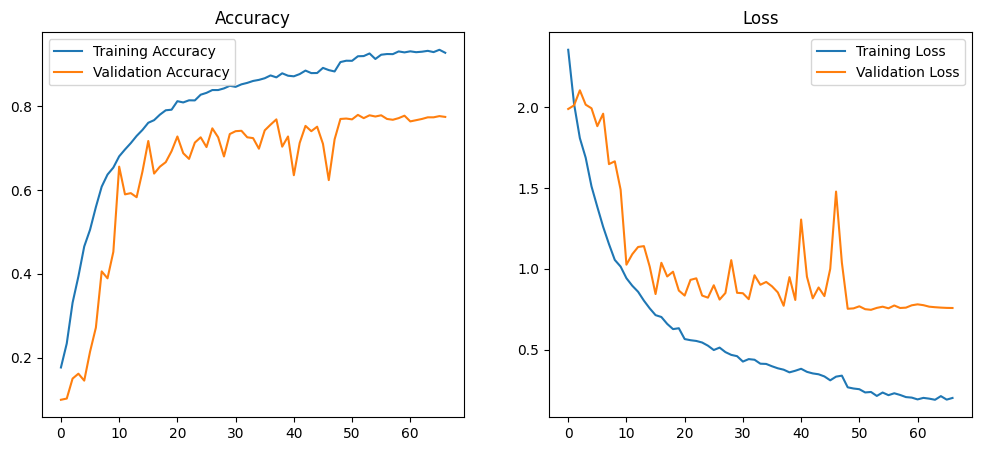

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['Training Accuracy', "Validation Accuracy"])

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Loss")
plt.legend(["Training Loss", "Validation Loss"])

plt.show()

# Checking model accuracy

In [14]:
pred=model.predict(test_gen)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(test_gen.labels, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       190
           1       0.72      0.82      0.77       165
           2       0.78      0.54      0.63        97
           3       0.97      0.90      0.93       153
           4       0.87      0.86      0.86       174
           5       0.59      0.70      0.64       105
           6       0.74      0.84      0.78       143

    accuracy                           0.78      1027
   macro avg       0.78      0.76      0.77      1027
weighted avg       0.79      0.78      0.78      1027



# Saving model

In [17]:
model.save('/kaggle/working/facial-expression-detection-model.h5')